Using Year: 2024


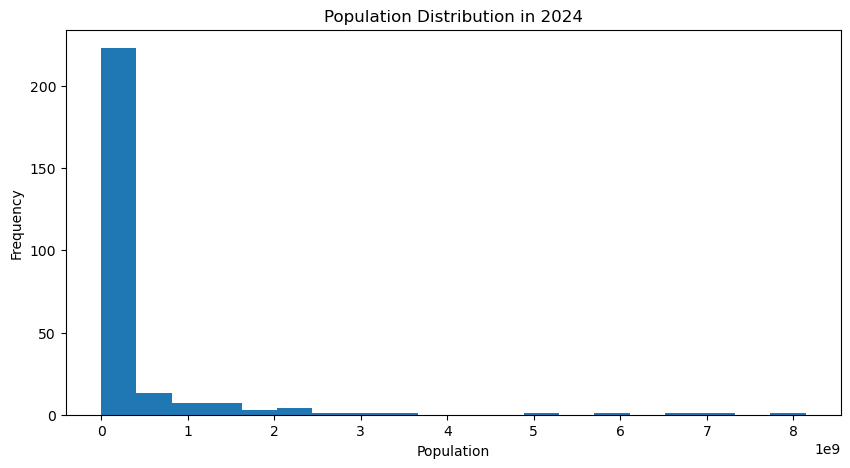

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (skip first 4 metadata rows)
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)

# Extract year columns (numeric)
year_cols = [col for col in df.columns if col.isdigit()]

# Select the latest year with valid data
latest_year = year_cols[-1]
print("Using Year:", latest_year)

# ---------------------------------------
# HISTOGRAM of Population for Latest Year
# ---------------------------------------
plt.figure(figsize=(10,5))
plt.hist(df[latest_year].dropna(), bins=20)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title(f"Population Distribution in {latest_year}")
plt.show()



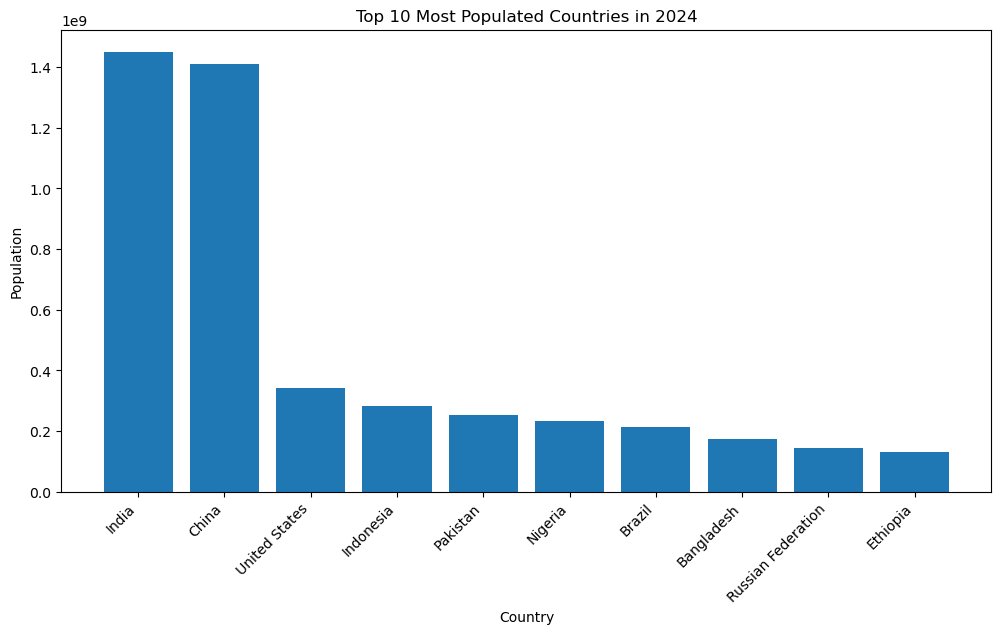

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load main dataset
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv', skiprows=4)

# Load metadata to filter real countries
meta = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2461.csv')

# Keep only real countries (Region NOT null)
countries = meta[meta["Region"].notna()]["Country Code"]

# Filter main df to show only real countries
df = df[df["Country Code"].isin(countries)]

# Select year columns
year_cols = [col for col in df.columns if col.isdigit()]
latest_year = year_cols[-1]

# ---------------------------
# Top 10 populated countries
# ---------------------------
top10 = df.nlargest(10, latest_year)[["Country Name", latest_year]]

plt.figure(figsize=(12,6))
plt.bar(top10["Country Name"], top10[latest_year])
plt.xlabel("Country")
plt.ylabel("Population")
plt.title(f"Top 10 Most Populated Countries in {latest_year}")
plt.xticks(rotation=45, ha='right')
plt.show()
